In [2]:
import pandas as pd
import matplotlib.pyplot as plt


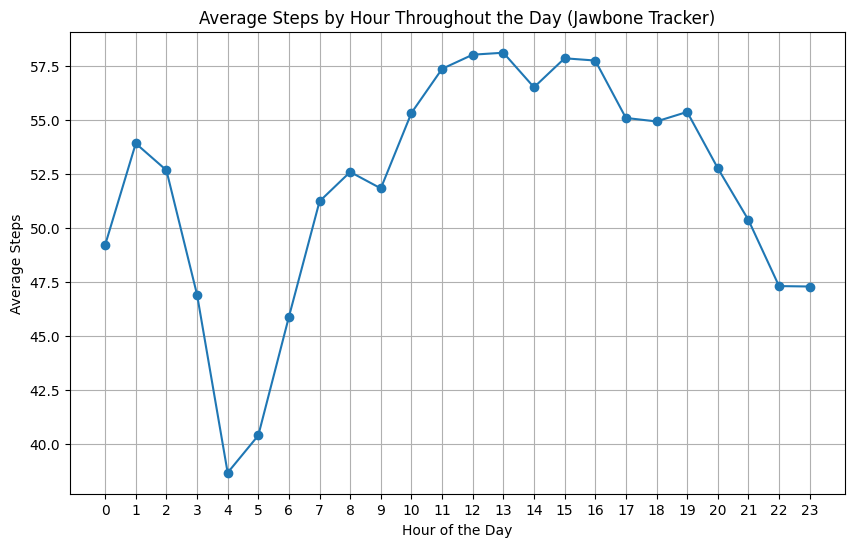

In [3]:

file_path = 'data/HeartStepsV1-main/data_files/jbsteps.csv'
jbsteps = pd.read_csv(file_path)

jbsteps['steps.utime.local'] = pd.to_datetime(jbsteps['steps.utime.local'])

jbsteps['hour'] = jbsteps['steps.utime.local'].dt.hour

average_steps_by_hour = jbsteps.groupby('hour')['steps'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_steps_by_hour['hour'], average_steps_by_hour['steps'], marker='o')
plt.title('Average Steps by Hour Throughout the Day (Jawbone Tracker)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

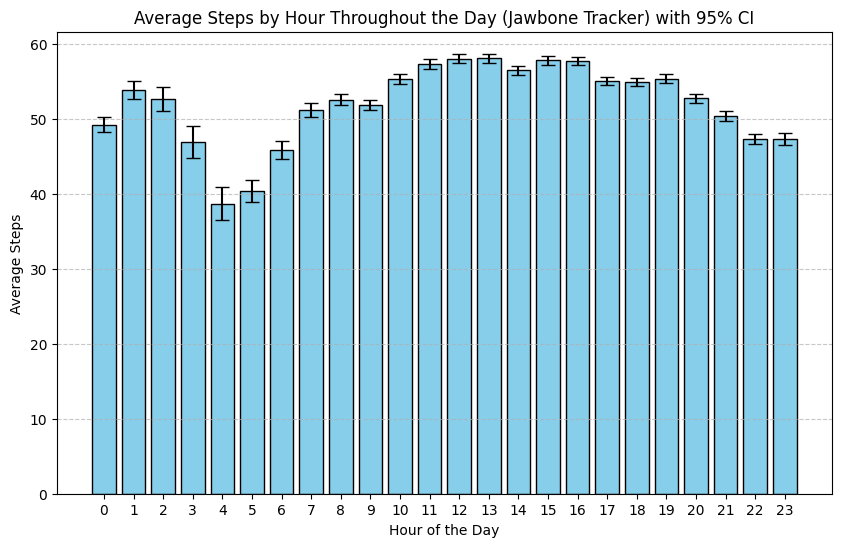

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'data/HeartStepsV1-main/data_files/jbsteps.csv'
jbsteps = pd.read_csv(file_path)

jbsteps['steps.utime.local'] = pd.to_datetime(jbsteps['steps.utime.local'])

jbsteps['hour'] = jbsteps['steps.utime.local'].dt.hour

average_steps_by_hour = jbsteps.groupby('hour')['steps'].agg(['mean', 'sem']).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_steps_by_hour['hour'], average_steps_by_hour['mean'], 
        yerr=1.96 * average_steps_by_hour['sem'], capsize=5, 
        color='skyblue', edgecolor='black')

plt.title('Average Steps by Hour Throughout the Day (Jawbone Tracker) with 95% CI')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Steps')
plt.xticks(range(0, 24))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()


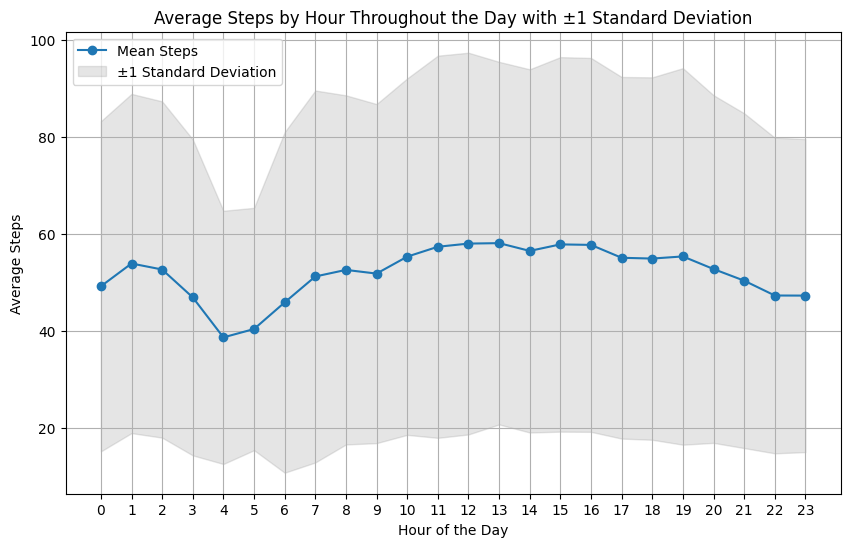

In [6]:
jbsteps = pd.read_csv(file_path)

# Convert the 'steps.utime.local' column to datetime to extract time of day
jbsteps['steps.utime.local'] = pd.to_datetime(jbsteps['steps.utime.local'])

# Extract hour from the local time to analyze time of day
jbsteps['hour'] = jbsteps['steps.utime.local'].dt.hour

# Group by hour and calculate average steps and standard deviation
stats_by_hour = jbsteps.groupby('hour')['steps'].agg(['mean', 'std']).reset_index()

# Ensure all columns have valid numeric data types
stats_by_hour['mean'] = pd.to_numeric(stats_by_hour['mean'], errors='coerce')
stats_by_hour['std'] = pd.to_numeric(stats_by_hour['std'], errors='coerce')

# Plot the average steps along with one standard deviation
plt.figure(figsize=(10, 6))
plt.plot(stats_by_hour['hour'], stats_by_hour['mean'], marker='o', label='Mean Steps')
plt.fill_between(stats_by_hour['hour'], 
                 stats_by_hour['mean'] - stats_by_hour['std'], 
                 stats_by_hour['mean'] + stats_by_hour['std'], 
                 color='gray', alpha=0.2, label='±1 Standard Deviation')

plt.title('Average Steps by Hour Throughout the Day with ±1 Standard Deviation')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.show()